In [1]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Memuat dataset
data_regresi = pd.read_csv('R04_corruptions.csv')
data_klasifikasi = pd.read_csv('K03_counter_strike_2.csv')

In [3]:
# Langkah 1: Eksplorasi dan Pra-pemrosesan Data
# Tampilkan beberapa baris pertama dari setiap dataset untuk memahami struktur data
print("Pratinjau Dataset Regresi:")
print(data_regresi.head())
print("\nPratinjau Dataset Klasifikasi:")
print(data_klasifikasi.head())

Pratinjau Dataset Regresi:
   Corruption Perception (X)  Government Transparency (Y)
0                        3.2                           65
1                        2.5                           72
2                        4.1                           58
3                        2.8                           68
4                        3.5                           60

Pratinjau Dataset Klasifikasi:
   time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets round_winner  
0       0.0      0.0    4000.0   4

In [4]:
# Periksa nilai null di setiap dataset
print("\nNilai null di dataset Regresi:", data_regresi.isnull().sum())
print("\nNilai null di dataset Klasifikasi:", data_klasifikasi.isnull().sum())


Nilai null di dataset Regresi: Corruption Perception (X)      0
Government Transparency (Y)    0
dtype: int64

Nilai null di dataset Klasifikasi: time_left       0
ct_score        0
t_score         0
map             0
bomb_planted    0
ct_health       0
t_health        0
ct_armor        0
t_armor         0
ct_money        0
t_money         0
ct_helmets      0
t_helmets       0
round_winner    0
dtype: int64


In [5]:
# Menghapus atau mengisi nilai null jika diperlukan
# Contoh: data_regresi = data_regresi.dropna()
# Contoh: data_klasifikasi = data_klasifikasi.fillna(method='ffill')

# Langkah 2: Seleksi Fitur
# Misalkan variabel target ada di kolom terakhir untuk kedua dataset
X_reg = data_regresi.iloc[:, :-1]  # Fitur untuk regresi
y_reg = data_regresi.iloc[:, -1]   # Target untuk regresi

X_klf = data_klasifikasi.iloc[:, :-1]  # Fitur untuk klasifikasi
y_klf = data_klasifikasi.iloc[:, -1]   # Target untuk klasifikasi

In [6]:
# Langkah 3: Membagi data menjadi set pelatihan dan pengujian
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_klf, X_test_klf, y_train_klf, y_test_klf = train_test_split(X_klf, y_klf, test_size=0.2, random_state=42)


In [7]:
# Langkah 4: Melatih Model Decision Tree

# Model Regresi
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)


DecisionTreeRegressor(random_state=42)

In [10]:
from sklearn.preprocessing import LabelEncoder

# Deteksi kolom bertipe object (string) di data klasifikasi
for column in X_klf.columns:
    if X_klf[column].dtype == 'object':
        le = LabelEncoder()
        X_klf[column] = le.fit_transform(X_klf[column])

# Memastikan y_klf juga dalam bentuk numerik
if y_klf.dtype == 'object':
    le = LabelEncoder()
    y_klf = le.fit_transform(y_klf)

# Setelah konversi, ulangi pemisahan data
X_train_klf, X_test_klf, y_train_klf, y_test_klf = train_test_split(X_klf, y_klf, test_size=0.2, random_state=42)

# Melatih Model Klasifikasi setelah perbaikan
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_klf, y_train_klf)


DecisionTreeClassifier(random_state=42)

In [11]:
# Model Klasifikasi
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_klf, y_train_klf)

DecisionTreeClassifier(random_state=42)

In [12]:
# Langkah 5: Evaluasi Model

# Untuk Regresi
y_pred_reg = regressor.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Mean Squared Error untuk Regresi:", mse)

Mean Squared Error untuk Regresi: 11.136363636363637


In [13]:
# Untuk Klasifikasi
y_pred_klf = classifier.predict(X_test_klf)
accuracy = accuracy_score(y_test_klf, y_pred_klf)
print("Akurasi untuk Klasifikasi:", accuracy)
print("\nLaporan Klasifikasi:\n", classification_report(y_test_klf, y_pred_klf))

Akurasi untuk Klasifikasi: 0.8525

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       156
           1       0.88      0.88      0.88       244

    accuracy                           0.85       400
   macro avg       0.84      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



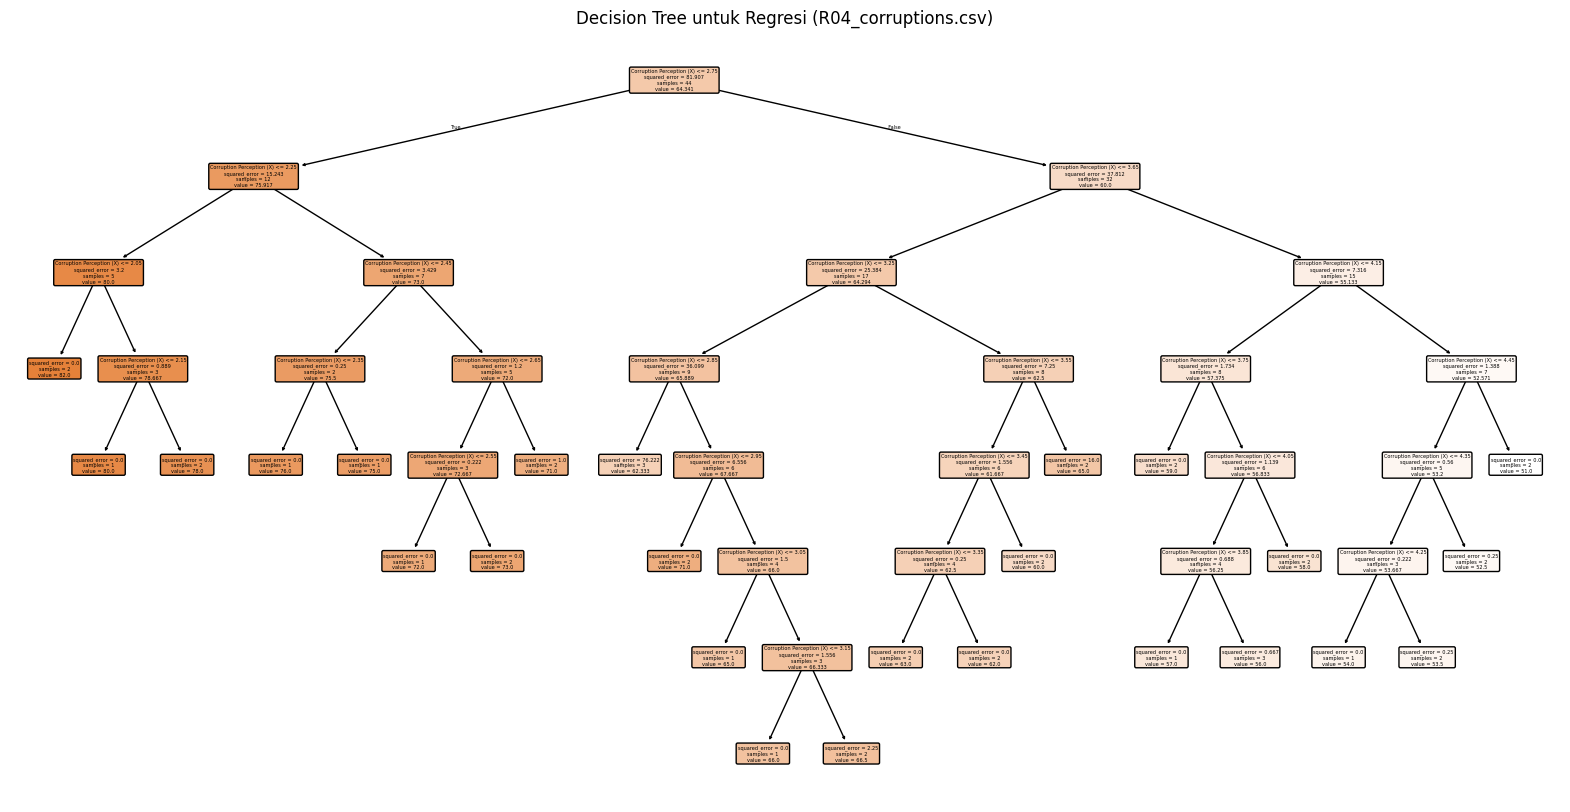

In [14]:
# Langkah 6: Visualisasi Decision Tree

# Plot pohon regresi
plt.figure(figsize=(20,10))
tree.plot_tree(regressor, filled=True, feature_names=X_reg.columns, rounded=True)
plt.title("Decision Tree untuk Regresi (R04_corruptions.csv)")
plt.show()

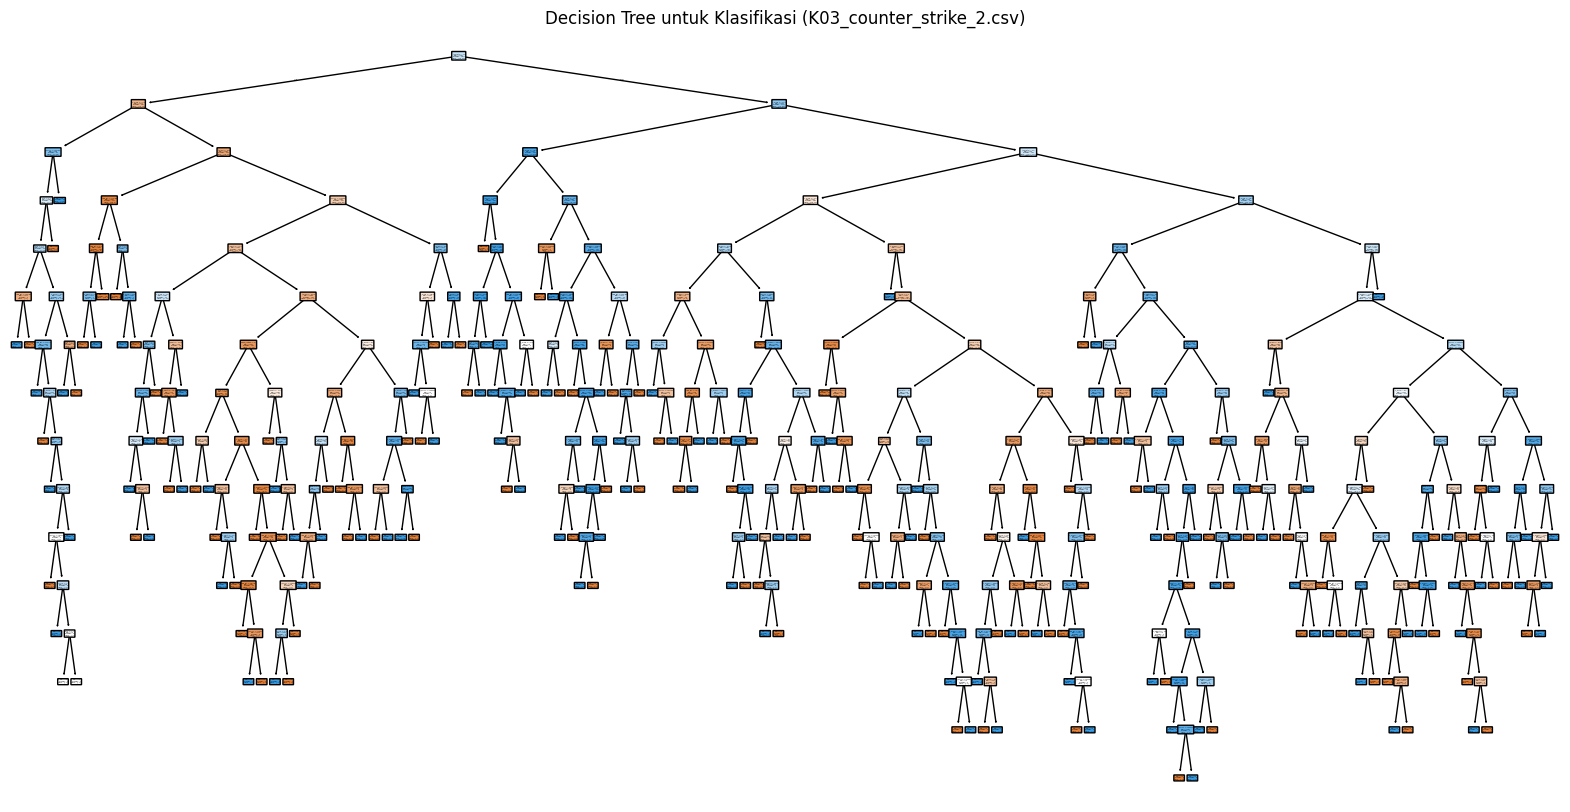

In [15]:
# Plot pohon klasifikasi
plt.figure(figsize=(20,10))
tree.plot_tree(classifier, filled=True, feature_names=X_klf.columns, class_names=np.unique(y_klf).astype(str), rounded=True)
plt.title("Decision Tree untuk Klasifikasi (K03_counter_strike_2.csv)")
plt.show()